# Wstęp do Multimediów - Laboratorum 5
## Kamil Jaworski, nr indeksu 335201

Numer_indeksu % liczba_zdjęć = x

In [1]:
nr_zdj = 335201 % 36
print("numer zdjęcia po losowaniu: ", nr_zdj)

numer zdjęcia po losowaniu:  5


In [2]:
%pip install numpy matplotlib opencv-python


image, wymiary: (512, 768), typ danych: uint8, wartości: 2 - 255


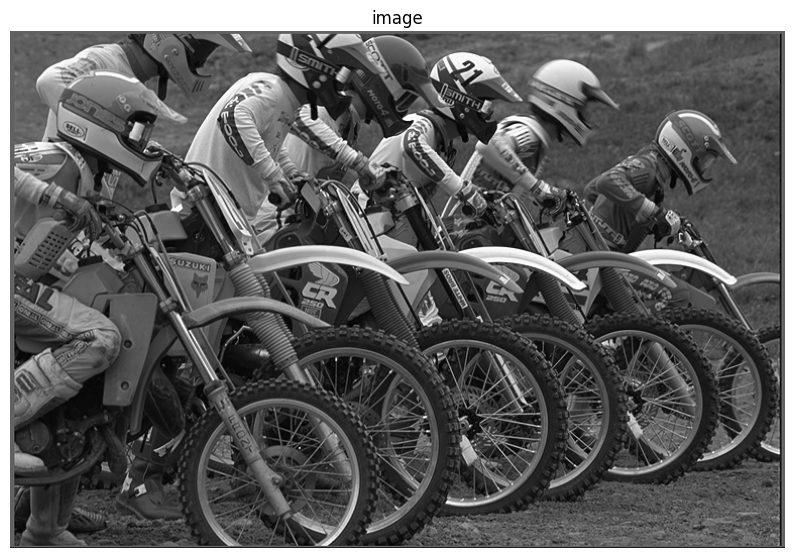

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

path = r"..\LAB_5\monochrome\bikes_mono.png" 

def printi(img, img_title="image"):
    """ Pomocnicza funkcja do wypisania informacji o obrazie. """
    print(f"{img_title}, wymiary: {img.shape}, typ danych: {img.dtype}, wartości: {img.min()} - {img.max()}")

def plt_imshow(img, img_title="image"):
    """
    Funkcja do wyświetlania obrazu z wykorzystaniem Matplotlib w Jupyter Notebook.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')
    plt.title(img_title)
    plt.axis('off')
    plt.show()

# Ładowanie obrazu
img = cv2.imread(path, cv2.IMREAD_UNCHANGED) 
if img is not None:
    printi(img)
    plt_imshow(img)
else:
    print("Nie udało się wczytać obrazu. Sprawdź ścieżkę do pliku.")


## Zad. 1
Obliczenie Entropii obrazu wejściowego - `monochromatycznego`.

In [4]:
def calc_entropy(hist):
    pdf = hist/hist.sum() ### normalizacja histogramu -> rozkład prawdopodobieństwa; UWAGA: niebezpieczeństwo '/0' dla 'zerowego' histogramu!!!
    # entropy = -(pdf*np.log2(pdf)).sum() ### zapis na tablicach, ale problem z '/0'
    entropy = -sum([x*np.log2(x) for x in pdf if x != 0])
    return entropy

image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
hist_image = cv2.calcHist([image], [0], None, [256], [0, 256])

hist_image = hist_image.flatten()

H_image = calc_entropy(hist_image)
print(f"H(image) = {H_image:.4f}")

H(image) = 7.3599


obraz różnicowy
## Zad. 2
Wyznaczenie obrazu różnicowego w taki sposób, że wartość każdego piksela jest zastępowana różnicą pomiędzy jego wartością a wartością jego lewego sąsiada (kodowanie różnicowe/predykcyjne). Dla pierwszego piksela w linii przyjmuje się wartość sąsiada równą 127 (środkowa wartość przedziału zmienności wartości pikseli). 
- Wyświetlenie obraz różnicowy.

- Wyznaczenie histogramu obrazu różnicowego i porównanie go z histogramem obrazu oryginalnego.

- Wyznaczenie entropii obrazu różnicowego i porównanie jej z entropią obrazu oryginalnego,


image_hdiff, wymiary: (512, 767), typ danych: int16, wartości: -211 - 219
image_hdiff_0, wymiary: (512, 1), typ danych: int16, wartości: -95 - -28
image_hdiff, wymiary: (512, 768), typ danych: int16, wartości: -211 - 219


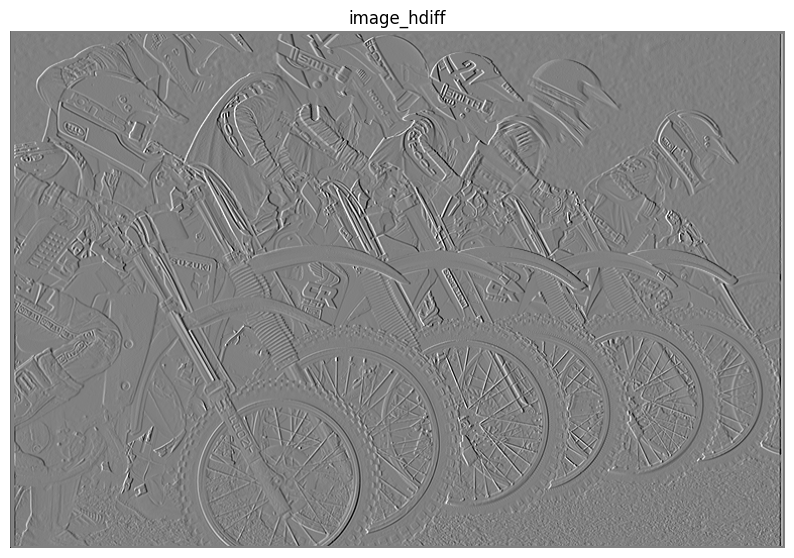

H(oryginalny) = 7.3599
H(różnicowy) = 5.8910


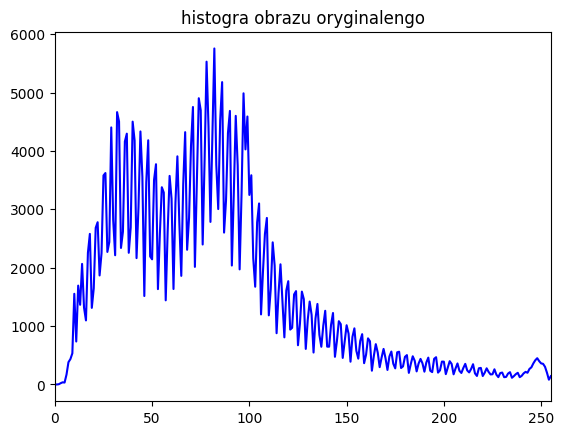

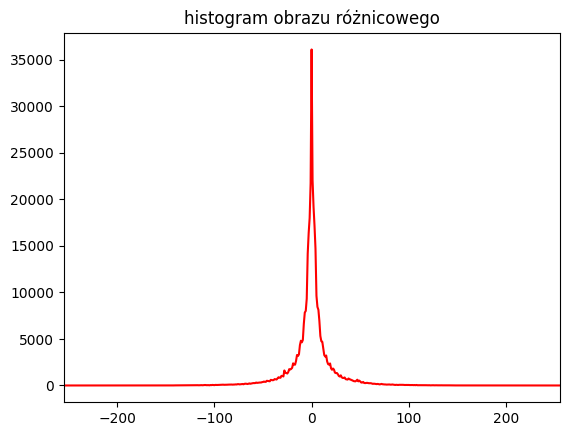

In [5]:
img_tmp1 = image[:, 1:] 
img_tmp2 = image[:, :-1] 


image_hdiff = cv2.addWeighted(img_tmp1, 1, img_tmp2, -1, 0, dtype=cv2.CV_16S)
printi(image_hdiff, "image_hdiff")

image_hdiff_0 = cv2.addWeighted(image[:, 0], 1, 0, 0, -127, dtype=cv2.CV_16S) ### od 'zerowej' kolumny obrazu oryginalnego odejmowana stała wartość '127'
printi(image_hdiff_0, "image_hdiff_0")
image_hdiff = np.hstack((image_hdiff_0, image_hdiff)) ### połączenie tablic w kierunku poziomym, czyli 'kolumna za kolumną'
printi(image_hdiff, "image_hdiff")

# przesunięcie zakresu poprzez dodanie połowy zakresu (0-255) oraz obcięcie wartości wychodzących poza zakres
image_hdiff_scaled = np.clip(image_hdiff + 128, 0, 255).astype(np.uint8)
plt_imshow(image_hdiff_scaled, "image_hdiff")             

cv2.waitKey(0)          
cv2.destroyAllWindows() 

image_tmp = (image_hdiff+255).astype(np.uint16)
hist_hdiff = cv2.calcHist([image_tmp], [0], None, [511], [0, 511]).flatten()
# print(hist_hdiff.sum())

H_image = calc_entropy(hist_image)
print(f"H(oryginalny) = {H_image:.4f}")

H_hdiff = calc_entropy(hist_hdiff)
print(f"H(różnicowy) = {H_hdiff:.4f}")

# Wyświetlenie histogramów
plt.figure()
plt.plot(hist_image, color="blue")
plt.title("histogra obrazu oryginalengo")
plt.xlim([0, 255])
plt.figure()
plt.plot(np.arange(-255, 256, 1), hist_hdiff, color="red") 
plt.title("histogram obrazu różnicowego")
plt.xlim([-255, 255])

plt.show() 


Analiza histogramów:

   - Histogram obrazu oryginalnego pokazuje rozłożenie intensywności pikseli na szerokim zakresie, co sugeruje obecność zarówno jasnych, jak i ciemnych obszarów w obrazie. Histogram ten jest bardziej zróżnicowany, co odzwierciedla większą różnorodność w zakresie intensywności.
   - Histogram obrazu różnicowego koncentruje się wokół wartości zero, co wskazuje, że większość pikseli ma minimalne różnice w jasności względem swojego lewego sąsiada. To pokazuje, że obraz różnicowy zawiera głównie małe lokalne zmiany intensywności, co jest typowe dla obszarów o jednolitej teksturze. Rozkład różnicowy jest znacznie mniej zróżnicowany niż histogram obrazu oryginalnego.

Analiza entropii:

   - Entropia obrazu oryginalnego wynosi 7.3599, co świadczy o wysokiej zmienności i bogactwie informacji w obrazie. Wyższa entropia odzwierciedla większą nieprzewidywalność i różnorodność intensywności pikseli.
   - Entropia obrazu różnicowego jest znacząco niższa (5.8910), co wskazuje na mniejszą ilość informacji i mniejszą złożoność obrazu. Niższa entropia sugeruje, że większość różnic między sąsiednimi pikselami jest niewielka, co potwierdza obserwacje z histogramu.

Porównanie entropii i histogramów:

   - Porównanie obu histogramów wskazuje, że obraz różnicowy ma mniej zróżnicowaną strukturę niż obraz oryginalny, co jest bezpośrednio odzwierciedlone w niższych wartościach entropii.
   - Wyższa entropia obrazu oryginalnego w porównaniu z obrazem różnicowym podkreśla, że oryginalny obraz zawiera więcej informacji o różnorodności jasności, co jest utracone w obrazie różnicowym zdominowanym przez małe lokalne zmiany.

## Zad. 3

LL, wymiary: (256, 384), typ danych: uint8, wartości: 0 - 255
LH, wymiary: (256, 384), typ danych: int16, wartości: -126 - 139
HL, wymiary: (256, 384), typ danych: int16, wartości: -139 - 151
HH, wymiary: (256, 384), typ danych: int16, wartości: -164 - 212


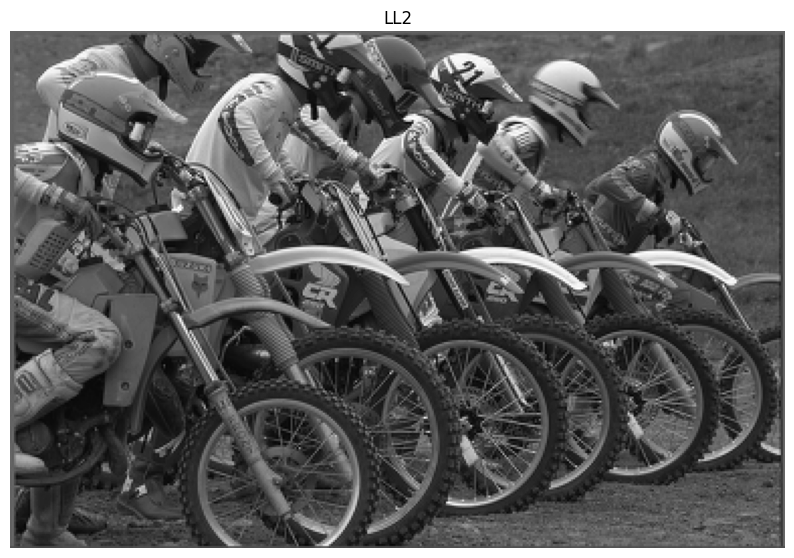

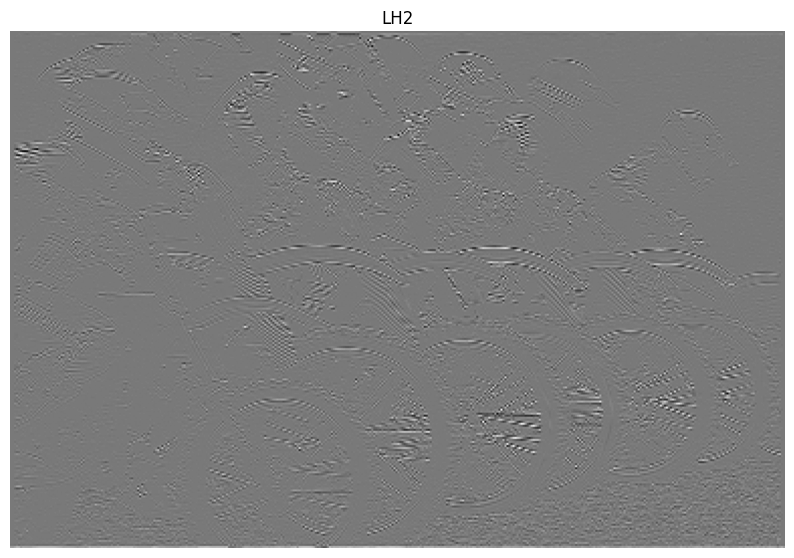

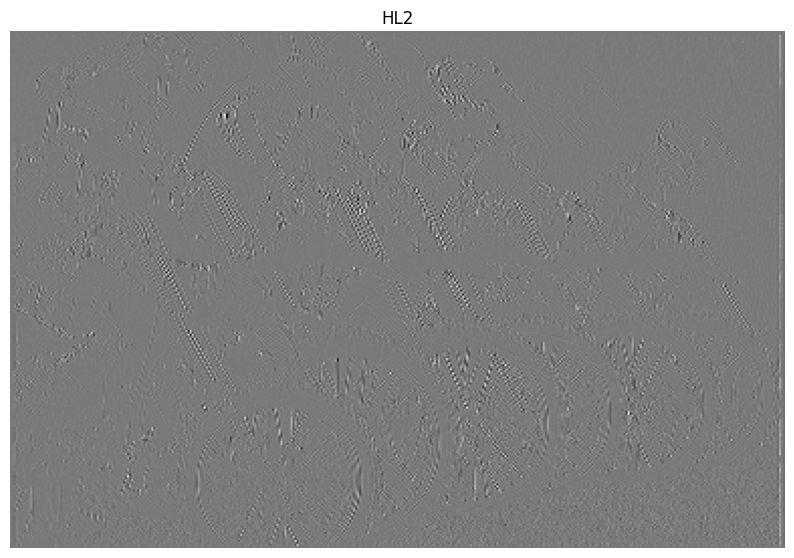

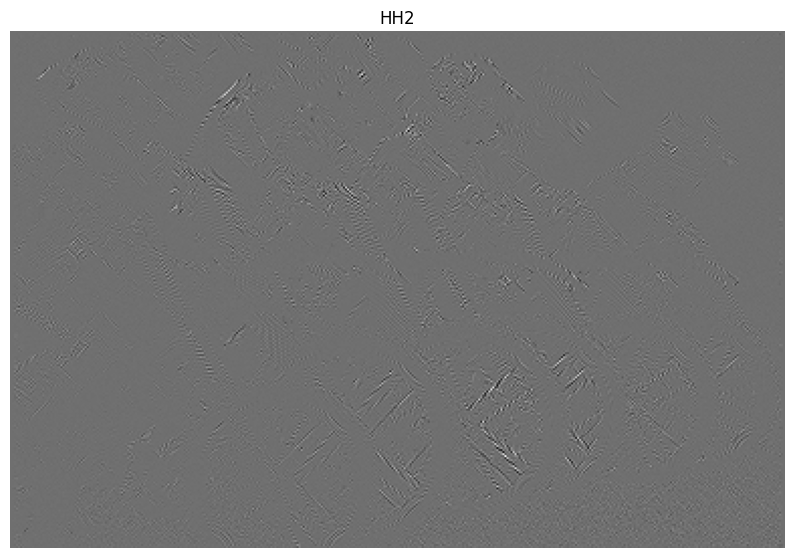

H(LL) = 7.3746 
H(LH) = 5.3553 
H(HL) = 5.2674 
H(HH) = 5.2771 
H_śr = 5.8186


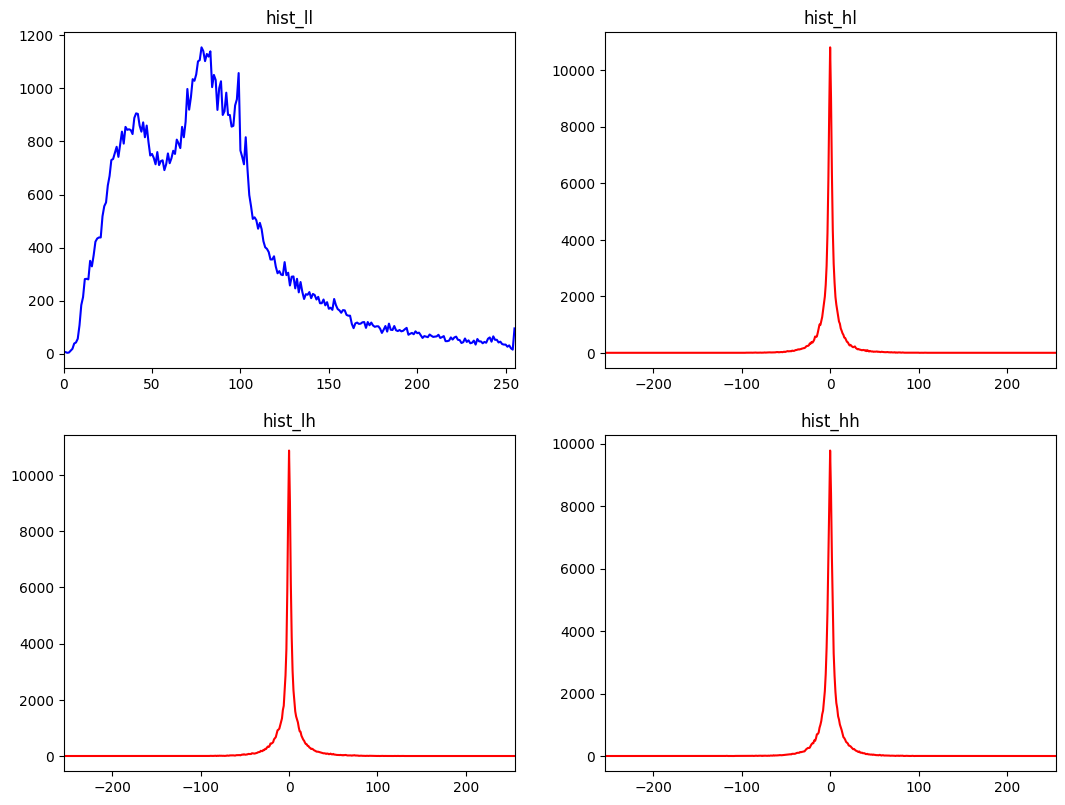

In [6]:
skip_wnd = False

def dwt(img):
    """
    Bardzo prosta i podstawowa implementacja, nie uwzględniająca efektywnych metod obliczania DWT
    i dopuszczająca pewne niedokładności.
    """
    maskL = np.array([0.02674875741080976, -0.01686411844287795, -0.07822326652898785, 0.2668641184428723,
        0.6029490182363579, 0.2668641184428723, -0.07822326652898785, -0.01686411844287795, 0.02674875741080976])
    maskH = np.array([0.09127176311424948, -0.05754352622849957, -0.5912717631142470, 1.115087052456994,
        -0.5912717631142470, -0.05754352622849957, 0.09127176311424948])

    bandLL = cv2.sepFilter2D(img,         -1, maskL, maskL)[::2, ::2]
    bandLH = cv2.sepFilter2D(img, cv2.CV_16S, maskL, maskH)[::2, ::2] ### ze względu na filtrację górnoprzepustową -> wartości ujemne, dlatego wynik 16-bitowy ze znakiem
    bandHL = cv2.sepFilter2D(img, cv2.CV_16S, maskH, maskL)[::2, ::2]
    bandHH = cv2.sepFilter2D(img, cv2.CV_16S, maskH, maskH)[::2, ::2]

    return bandLL, bandLH, bandHL, bandHH


ll, lh, hl, hh = dwt(image)
printi(ll, "LL")
printi(lh, "LH")
printi(hl, "HL")
printi(hh, "HH")

plt_imshow(ll, "LL2")
plt_imshow(cv2.multiply(lh, 2), "LH2") ### cv2.multiply() -> zwiększenie kontrastu obrazów 'H', żeby lepiej uwidocznić
plt_imshow(cv2.multiply(hl, 2), "HL2")
plt_imshow(cv2.multiply(hh, 2), "HH2")

cv2.waitKey(0)

""" Entropia dla obrazów pasmowych """

hist_ll = cv2.calcHist([ll], [0], None, [256], [0, 256]).flatten()
hist_lh = cv2.calcHist([(lh+255).astype(np.uint16)], [0], None, [511], [0, 511]).flatten() ### zmiana zakresu wartości i typu danych ze względu na cv2.calcHist() (jak wcześniej przy obrazach różnicowych)
hist_hl = cv2.calcHist([(hl+255).astype(np.uint16)], [0], None, [511], [0, 511]).flatten()
hist_hh = cv2.calcHist([(hh+255).astype(np.uint16)], [0], None, [511], [0, 511]).flatten()
H_ll = calc_entropy(hist_ll)
H_lh = calc_entropy(hist_lh)
H_hl = calc_entropy(hist_hl)
H_hh = calc_entropy(hist_hh)
print(f"H(LL) = {H_ll:.4f} \nH(LH) = {H_lh:.4f} \nH(HL) = {H_hl:.4f} \nH(HH) = {H_hh:.4f} \nH_śr = {(H_ll+H_lh+H_hl+H_hh)/4:.4f}")

""" Wyświetlenie histogramów - jeden obraz z czterema pod-obrazami """
fig = plt.figure()
fig.set_figheight(fig.get_figheight()*2) ### zwiększenie rozmiarów okna
fig.set_figwidth(fig.get_figwidth()*2)
plt.subplot(2, 2, 1)
plt.plot(hist_ll, color="blue")
plt.title("hist_ll")
plt.xlim([0, 255])
plt.subplot(2, 2, 3)
plt.plot(np.arange(-255, 256, 1), hist_lh, color="red")
plt.title("hist_lh")
plt.xlim([-255, 255])
plt.subplot(2, 2, 2)
plt.plot(np.arange(-255, 256, 1), hist_hl, color="red")
plt.title("hist_hl")
plt.xlim([-255, 255])
plt.subplot(2, 2, 4)
plt.plot(np.arange(-255, 256, 1), hist_hh, color="red")
plt.title("hist_hh")
plt.xlim([-255, 255])

if not skip_wnd: plt.show() 
cv2.destroyAllWindows() 

Analizując wyniki transformacji falkowej DWT, przeprowadzonej na obrazie, można zaobserwować, że entropie poszczególnych pasm różnią się od siebie, co dostarcza cennych informacji o charakterze danych w każdym z nich:
Analiza entropii poszczególnych pasm:

   - Pasmo LL ma entropię 7.3746, co jest najwyższą wartością wśród wszystkich pasm. Pasmo to zawiera główne cechy obrazu, takie jak ogólna struktura i kontury, co tłumaczy jego wysoką entropię. Jest to spodziewane, gdyż pasmo LL jest wynikiem filtracji dolnoprzepustowej, która zachowuje podstawowe, najbardziej zasadnicze elementy obrazu.
   - Pasma LH, HL, i HH mają znacząco niższe wartości entropii (odpowiednio 5.3553, 5.2674, i 5.2771), co wskazuje na to, że zawierają one mniej informacji ogólnej o obrazie, a skupiają się na reprezentacji detali takich jak krawędzie i tekstury. Niższa entropia tych pasm sugeruje, że są one mniej zróżnicowane i koncentrują się na bardziej subtelnych i lokalnych zmianach w obrazie.

Porównanie pasm z obrazem oryginalnym i różnicowym:

   - Entropia obrazu oryginalnego wynosi 7.3599, co jest bardzo zbliżone do wartości entropii pasma LL. To pokazuje, że pasmo LL efektywnie przechowuje większość informacyjnego bogactwa obrazu oryginalnego.
   - Entropia obrazu różnicowego jest niższa, wynosi 5.8910, co jest wartością zbliżoną do entropii pasm LH, HL, i HH. To wskazuje, że te pasma, podobnie jak obraz różnicowy, koncentrują się na mniej zróżnicowanych informacjach, co jest typowe dla obszarów z subtelnymi różnicami w intensywności czy teksturze.

Wnioski:

Entropie pasm uzyskanych z transformacji DWT podkreślają, jak transformacja ta segmentuje obraz na różne składowe, z których każda przenosi inny rodzaj informacji. Pasmo LL zachowuje główne cechy obrazu, natomiast pasma LH, HL, i HH są bardziej ukierunkowane na detale i lokalne różnice. Taka analiza może być kluczowa w wielu zastosowaniach, takich jak kompresja obrazu, gdzie różne pasma mogą być traktowane w różny sposób w zależności od ich zawartości informacyjnej.

## Zad 4

Przepływność

uwagi: informacja w wyniku przekształceń się nie zmienia, kodowanie png jest bezstratne
I < H bo: 

In [16]:
bitrate = 8*os.stat(path).st_size/(image.shape[0]*image.shape[1])
print(f"bitrate: {bitrate:.4f}")


print(f"Oryginalny: = {H_image:.4f}")

print(f"Różnicowy = {H_hdiff:.4f}")

print("Falkowe: \n")
print(f"H(LL) = {H_ll:.4f} \nH(LH) = {H_lh:.4f} \nH(HL) = {H_hl:.4f} \nH(HH) = {H_hh:.4f} \nH_śr = {(H_ll+H_lh+H_hl+H_hh)/4:.4f}")

bitrate: 5.8110
Oryginalny: = 7.3599
Różnicowy = 5.8910
Falkowe: 

H(LL) = 7.3746 
H(LH) = 5.3553 
H(HL) = 5.2674 
H(HH) = 5.2771 
H_śr = 5.8186


OBRAZY KOLOROWE

Entropia dla składowych RGB

image_col, wymiary: (512, 768, 3), typ danych: uint8, wartości: 1 - 255
H(R) = 7.4402 
H(G) = 7.4424 
H(B) = 7.2868 
H_śr = 7.3898


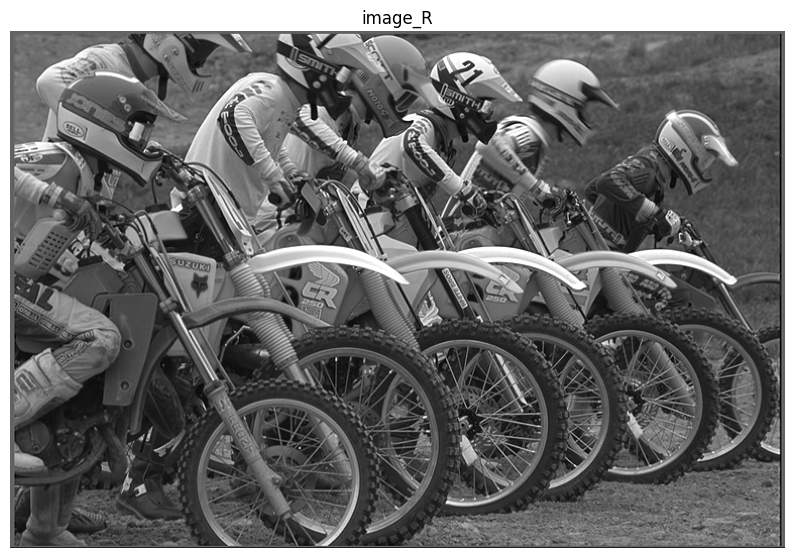

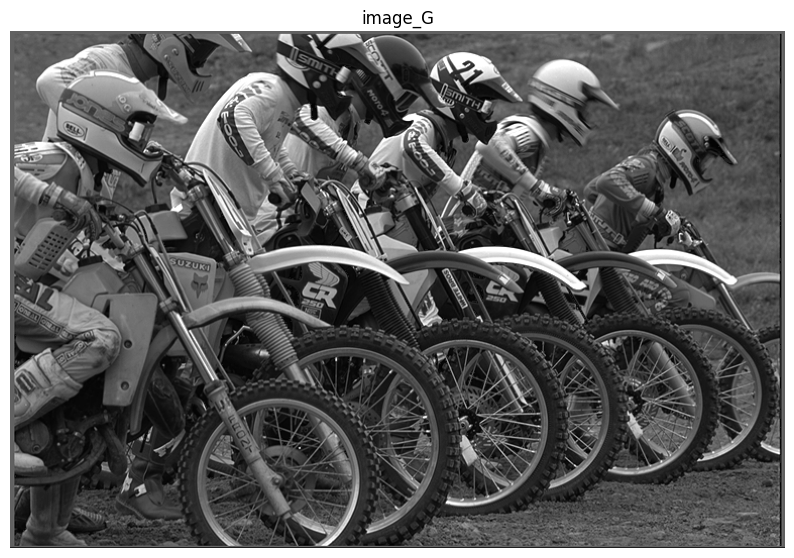

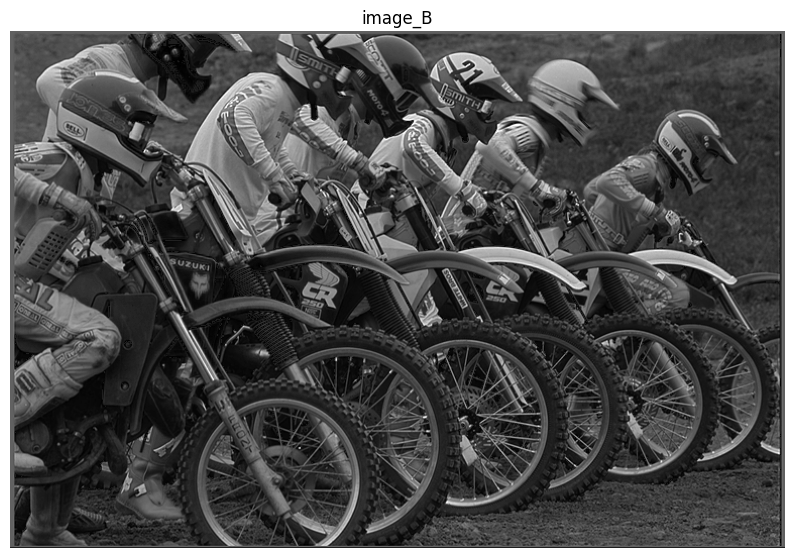

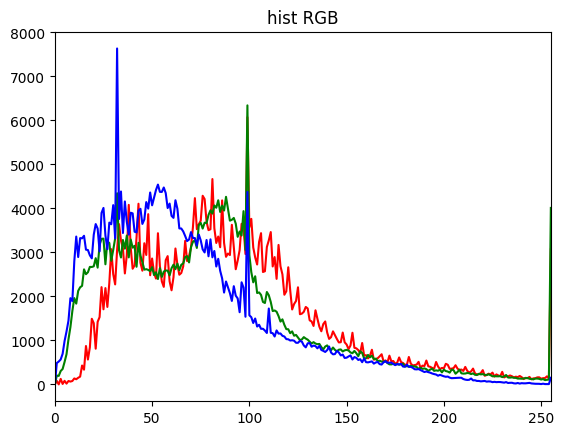

In [8]:
path_col = r"C:\Users\kamil\OneDrive\Pulpit\PW\sem2\WMM\LAB\WMM_WUT\LAB_4\obrazy_testowe\color\bikes_col.png"
skip_wnd = False


image_col = cv2.imread(path_col)
printi(image_col, "image_col")

image_R = image_col[:, :, 2] 
image_G = image_col[:, :, 1]
image_B = image_col[:, :, 0]

hist_R = cv2.calcHist([image_R], [0], None, [256], [0, 256]).flatten()
hist_G = cv2.calcHist([image_G], [0], None, [256], [0, 256]).flatten()
hist_B = cv2.calcHist([image_B], [0], None, [256], [0, 256]).flatten()

H_R = calc_entropy(hist_R)
H_G = calc_entropy(hist_G)
H_B = calc_entropy(hist_B)
print(f"H(R) = {H_R:.4f} \nH(G) = {H_G:.4f} \nH(B) = {H_B:.4f} \nH_śr = {(H_R+H_G+H_B)/3:.4f}")

plt_imshow(image_R, "image_R")
plt_imshow(image_G, "image_G")
plt_imshow(image_B, "image_B")
cv2.waitKey(0)

plt.figure()
plt.plot(hist_R, color="red")
plt.plot(hist_G, color="green")
plt.plot(hist_B, color="blue")
plt.title("hist RGB")
plt.xlim([0, 255])
if not skip_wnd: plt.show()              
cv2.destroyAllWindows() 


Konwersja RGB -> YUV

image_YUV, wymiary: (512, 768, 3), typ danych: uint8, wartości: 3 - 255
H(Y) = 7.3425 
H(U) = 4.8619 
H(V) = 5.0549 
H_śr = 5.7531


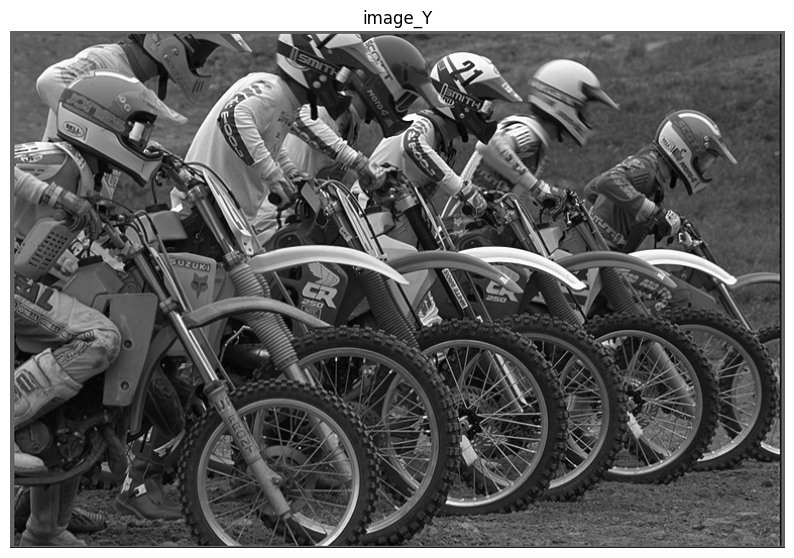

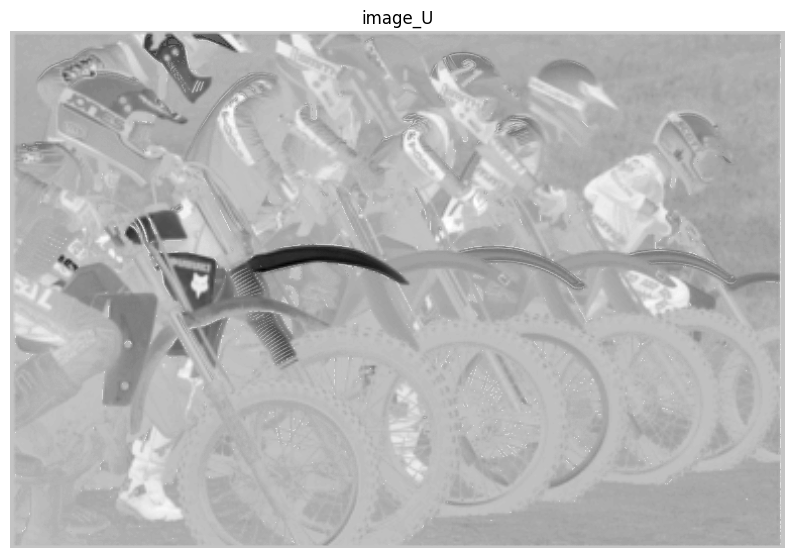

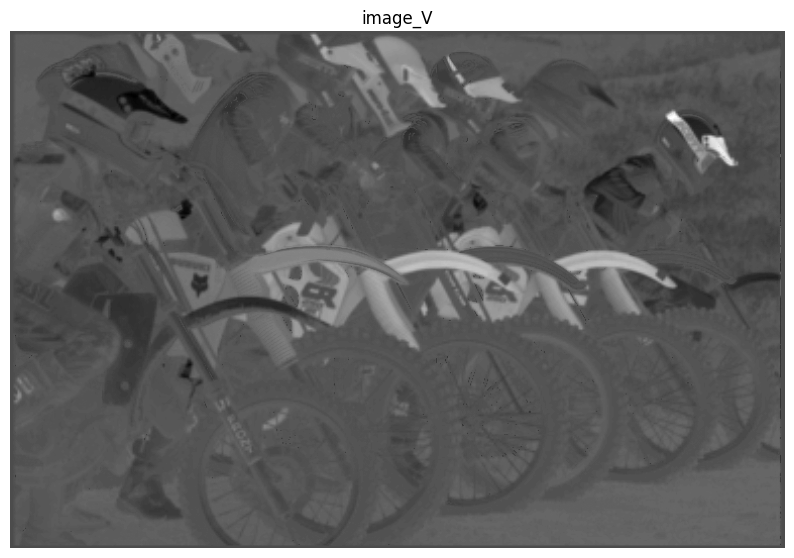

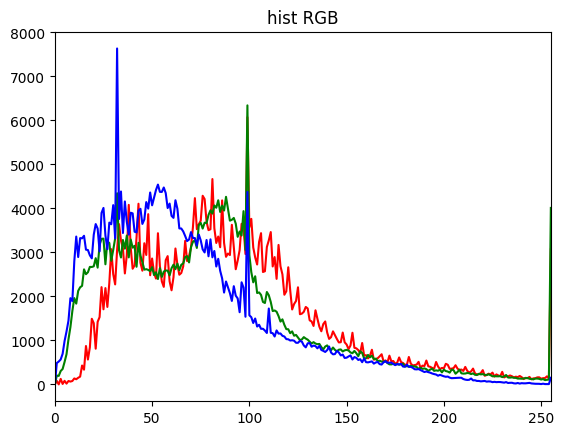

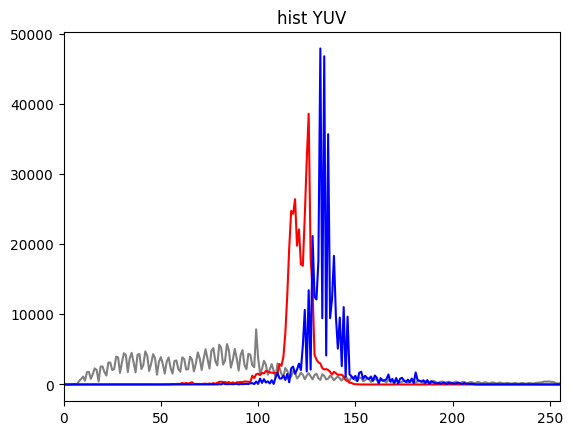

In [9]:
image_YUV = cv2.cvtColor(image_col, cv2.COLOR_BGR2YUV)
printi(image_YUV, "image_YUV")

# wyciągnięcie składowych Y, U, V
image_Y = image_YUV[:, :, 0]
image_U = image_YUV[:, :, 1]
image_V = image_YUV[:, :, 2]

# obliczenie histogramów dla składowych Y, U, V
hist_Y = cv2.calcHist([image_Y], [0], None, [256], [0, 256]).flatten()
hist_U = cv2.calcHist([image_U], [0], None, [256], [0, 256]).flatten()
hist_V = cv2.calcHist([image_V], [0], None, [256], [0, 256]).flatten()

# obliczenie entropii dla składowych Y, U, V
H_Y = calc_entropy(hist_Y)
H_U = calc_entropy(hist_U)
H_V = calc_entropy(hist_V)

print(f"H(Y) = {H_Y:.4f} \nH(U) = {H_U:.4f} \nH(V) = {H_V:.4f} \nH_śr = {(H_Y+H_U+H_V)/3:.4f}")

# wyświetlenie składowych Y, U, V
plt_imshow(image_Y, "image_Y")
plt_imshow(image_U, "image_U")
plt_imshow(image_V, "image_V")
cv2.waitKey(0)

# wyznaczenie histogramów dla składowych RGB i YUV
plt.figure()
plt.plot(hist_R, color="red")
plt.plot(hist_G, color="green")
plt.plot(hist_B, color="blue")
plt.title("hist RGB")
plt.xlim([0, 255])

plt.figure()
plt.plot(hist_Y, color="gray")
plt.plot(hist_U, color="red")
plt.plot(hist_V, color="blue")
plt.title("hist YUV")
plt.xlim([0, 255])

plt.show()
cv2.destroyAllWindows()

Analiza entropii składowych RGB i YUV:

   - RGB:
       - R (czerwony): Entropia wynosi 7.4402, co wskazuje na dużą zmienność w zakresie czerwieni, co może odzwierciedlać bogate detale i zmiany w tonacji czerwieni na obrazie.
       - G (zielony): Entropia wynosi 7.4424, podobnie wysoka, co sugeruje równie duży zakres zmienności w kolorze zielonym.
       - B (niebieski): Entropia 7.2868 jest nieco niższa, ale wciąż wskazuje na znaczną ilość informacji w kanałach niebieskich.

   - YUV:
       - Y (luma): Entropia 7.3425 świadczy o dużym zakresie jasności obrazu, co sugeruje, że obraz zawiera wiele różnych poziomów jasności, od bardzo jasnych do bardzo ciemnych.
       - U i V (chrominancja): Te składowe mają znacznie niższą entropię (odpowiednio 4.8619 i 5.0549), co wskazuje na mniejszą zmienność i mniejszą ilość informacji o kolorze, co jest typowe, ponieważ ludzkie oko jest mniej wrażliwe na zmiany barw niż na zmiany jasności.

Analiza histogramów składowych:

   - Histogram Y jest szeroko rozłożony, co potwierdza obserwacje wysokiej entropii i różnorodności w zakresie jasności.
   - Histogramy U i V są bardziej skoncentrowane wokół określonych wartości, co odzwierciedla niższą różnorodność i mniejszą ilość detali kolorystycznych.

Wnioski:

   1) Zróżnicowanie informacji w kanałach RGB: Wszystkie składowe RGB mają wysoką entropię, co wskazuje na to, że każdy kanał koloru przekazuje bogate informacje o obrazie, z różnorodnymi detalami i intensywnościami.

   2) Wysoka entropia w składowej Y: Składowa Y jest najbardziej informacyjna w porównaniu do U i V, co jest spodziewane, biorąc pod uwagę jej rolę w reprezentowaniu jasności obrazu. Wysoka entropia wskazuje na obecność dużej liczby detali i zróżnicowanie poziomów jasności, co jest kluczowe dla percepcji obrazu.
   
   3) Niższa entropia w składowych U i V: Składowe chrominancji mają niższą entropię, co wskazuje na to, że zmiany w kolorach nie są tak zróżnicowane jak zmiany w jasności. To sugeruje, że informacje o barwie mogą być kodowane z mniejszą szczegółowością, co jest zgodne z percepcyjnymi właściwościami ludzkiego wzroku.

Podsumowując, analiza składowych RGB i YUV dostarcza ważnych wskazówek na temat zawartości informacyjnej obrazu i jego percepcji przez ludzkie oko. Jest to istotne dla zastosowań takich jak kompresja obrazu, gdzie różne składowe mogą być traktowane z różnym priorytetem.

R-D

bitrate: 16.4764


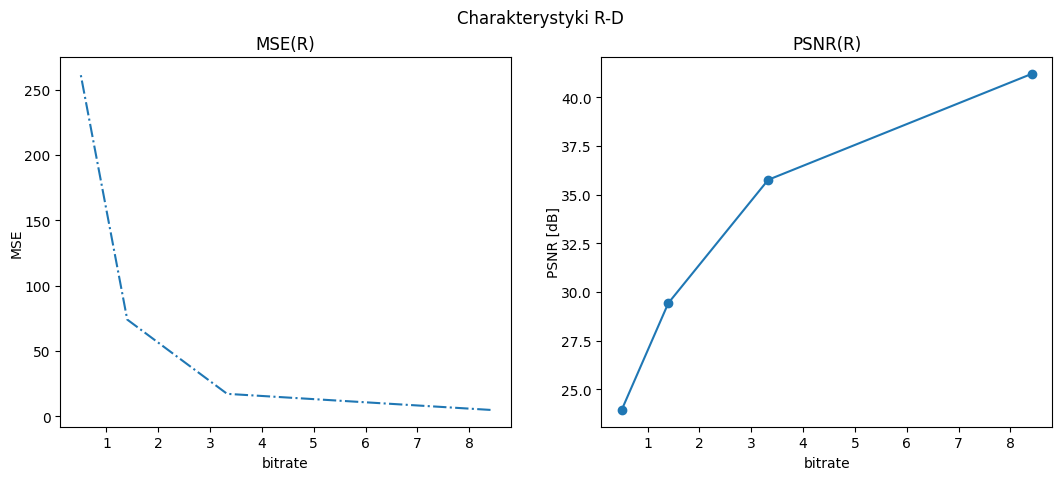

In [10]:
def calc_mse_psnr(img1, img2):
    imax = 255.**2 ### maksymalna wartość sygnału -> 255
    """
    W różnicy obrazów istotne są wartości ujemne, dlatego img1 konwertowany jest do typu np.float64 (liczby rzeczywiste) 
    aby nie ograniczać wyniku do przedziału [0, 255].
    """
    mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size 
    psnr = 10.0*np.log10(imax/mse)
    return (mse, psnr)


image = cv2.imread(path_col, cv2.IMREAD_UNCHANGED)
xx = [] ### tablica na wartości osi X -> bitrate
ym = [] ### tablica na wartości osi Y dla MSE
yp = [] ### tablica na wartości osi Y dla PSNR

for quality in [100, 90, 50, 10]: 
    out_file_name = f"obrazy_wmm_5/out_image_q{quality:03d}.jpg"
    """ Zapis do pliku w formacie .jpg z ustaloną 'jakością' """
    cv2.imwrite(out_file_name, image, (cv2.IMWRITE_JPEG_QUALITY, quality))
    """ Odczyt skompresowanego obrazu, policzenie bitrate'u i PSNR """
    image_compressed = cv2.imread(out_file_name, cv2.IMREAD_UNCHANGED)
    bitrate = 8*os.stat(out_file_name).st_size/(image.shape[0]*image.shape[1]) ### image.shape == image_compressed.shape
    mse, psnr = calc_mse_psnr(image, image_compressed)
    """ Zapamiętanie wyników do pózniejszego wykorzystania """
    xx.append(bitrate)
    ym.append(mse)
    yp.append(psnr)

bitrate = 8*os.stat(path_col).st_size/(image.shape[0]*image.shape[1])
print(f"bitrate: {bitrate:.4f}")

# Narysowanie wykresów 
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*2)
plt.suptitle("Charakterystyki R-D")
plt.subplot(1, 2, 1)
plt.plot(xx, ym, "-.")
plt.title("MSE(R)")
plt.xlabel("bitrate")
plt.ylabel("MSE", labelpad=0)
plt.subplot(1, 2, 2)
plt.plot(xx, yp, "-o")
plt.title("PSNR(R)")
plt.xlabel("bitrate")
plt.ylabel("PSNR [dB]", labelpad=0)
plt.show()


cv2.waitKey(0)          
cv2.destroyAllWindows() 